In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Example dataset (area, rooms, age) → price
data = {
    'area': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 5500],
    'rooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'age': [10, 15, 20, 5, 8, 12, 6, 3, 2, 1],
    'price': [200, 250, 300, 400, 430, 480, 500, 550, 600, 650]
}

df = pd.DataFrame(data)

# Features & target
X = df[['area', 'rooms', 'age']]
y = df['price']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
full_tree = DecisionTreeRegressor(random_state=42)
full_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_tree.predict(X_test)
print("Before Pruning:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Before Pruning:
MSE: 1800.0
R² Score: 0.9146469968387777


In [5]:
# Get effective alphas (complexity parameters)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees for each alpha
models = []
for alpha in ccp_alphas:
    m = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    m.fit(X_train, y_train)
    models.append(m)


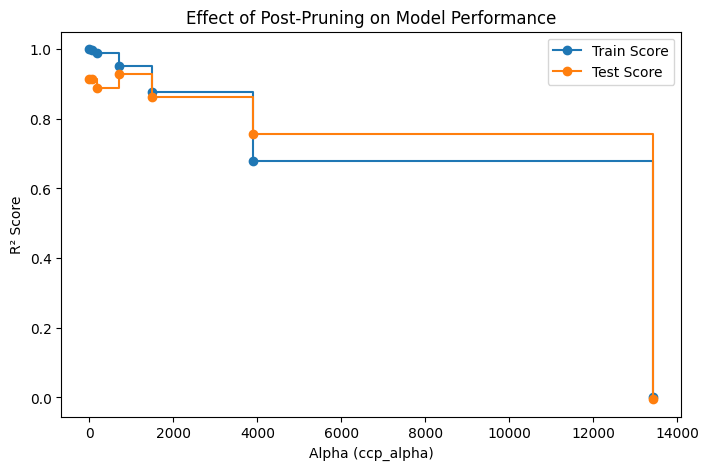

In [6]:
# Evaluate each model on test data
train_scores = [m.score(X_train, y_train) for m in models]
test_scores = [m.score(X_test, y_test) for m in models]

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Score', drawstyle="steps-post")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("R² Score")
plt.legend()
plt.title("Effect of Post-Pruning on Model Performance")
plt.show()


In [7]:
# Choose alpha giving best test score
best_alpha = ccp_alphas[np.argmax(test_scores)]
print("Best Alpha:", best_alpha)

# Retrain model using best alpha
pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluate again
y_pred_pruned = pruned_tree.predict(X_test)
print("\nAfter Post-Pruning:")
print("MSE:", mean_squared_error(y_test, y_pred_pruned))
print("R² Score:", r2_score(y_test, y_pred_pruned))


Best Alpha: 714.2857142857143

After Post-Pruning:
MSE: 1508.3333333333333
R² Score: 0.9284773445732349


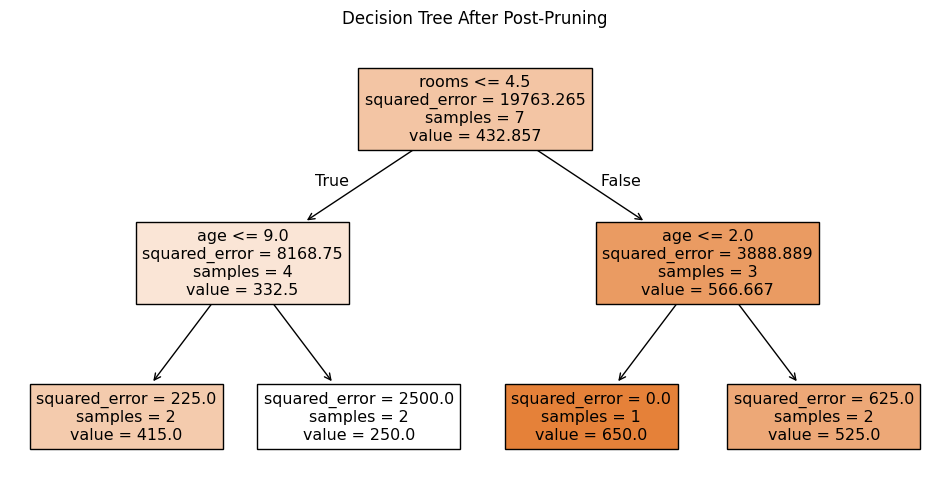

In [8]:
plt.figure(figsize=(12,6))
plot_tree(pruned_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree After Post-Pruning")
plt.show()
